<a href="https://colab.research.google.com/github/luisgomez1206/Mi-primer-Rpositorio/blob/main/Proyecto_Reconocimiento_de_Patrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import random
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Softmax, ReLU 
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from PIL import Image
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/drive')
path_data='/content/drive/MyDrive/proyecto_rec_patrones/dataset-master/dataset-master/JPEGImages/'
path_labels="/content/drive/MyDrive/proyecto_rec_patrones/dataset-master/dataset-master/labels.csv"
path_data2='/content/drive/MyDrive/proyecto_rec_patrones/dataset2-master/dataset2-master'

# Pre Procesamiento

## Metodos utiles varios




In [ ]:
def preprocess(path,small=True):
  #Dado el path de una imagen, hace la conversion a un array de 32x32
  im=Image.open(path)
  arr=np.array(im)
  if small==True:
    im_final= im.crop((40, 0,280, 240))
    np_crop=np.array(im_final)
    image_resized3 =resize(np_crop, (32, 32),anti_aliasing=False)
  else:
    im_final= im.crop((80, 0,560, 480))
    np_crop=np.array(im_final)
    image_resized3 =resize(np_crop, (32, 32),anti_aliasing=False)
  return [image_resized3,arr]


def show_img(some_array):
  plt.imshow(some_array)
  return

## Carga de datos

In [ ]:
file1="_0_5020.jpeg"
image= Image.open(path_data2+"/images/TEST_SIMPLE/MONOCYTE/"+file1)


In [ ]:
np_test=np.array(image)
np_test.shape

(240, 320, 3)

## Reduccion de tmno

### Intento 1

In [ ]:
image=np_test

NameError: ignored

In [ ]:
image_resized = resize(image, (32, 32),anti_aliasing=True)

image_resized.shape


In [ ]:
zz=Image.fromarray(image_resized,'RGB')

In [ ]:
plt.imshow(image_resized)

### Intento 2

In [ ]:
im=Image.open(path_data2+"/images/TEST_SIMPLE/MONOCYTE/"+file1)
im_final= im.crop((40, 0,280, 240))
np_crop=np.array(im_final)

In [ ]:
im.size

In [ ]:
im_final

In [ ]:
image_resized2 = resize(np_crop, (32, 32),anti_aliasing=True)
image_resized3 =resize(np_crop, (32, 32),anti_aliasing=False)
image_resized2.shape

In [ ]:
plt.imshow(image_resized2)

In [ ]:
plt.imshow(image_resized3)

Se utilizara entonces la imagen sin antialiasing para la reduccion debido a que se ven mejor los contrastes y esto puede ayudar a la deteccion de patrones.

La imagen tendra entonces un formato de (32,32,3) siendo 32 pixeles de alto y ancho y 3 canales para los colores RGB.

## Definicion de sets para red

## One hot encoding

In [ ]:
onehot={
    'NEUTROPHIL':np.array([1,0,0,0]),
    'MONOCYTE' : np.array([0,1,0,0]),
    'LYMPHOCYTE':np.array([0,0,1,0]),
    'EOSINOPHIL':np.array([0,0,0,1])
    }

In [ ]:
labels_dataframe=pd.read_csv(path_labels)
labels=labels_dataframe['Category']

### Set simple inicial

toma pocos segundos son 71 muestras

In [ ]:
Folder_list=[x[0] for x in os.walk(path_data2+"/images/TEST_SIMPLE/")]
Folder_list=Folder_list[1:]
set_simple=[]
set_simple_or=[]
labels_simple=[]
for folder in Folder_list:
  for filename in glob.glob(os.path.join(folder, '*.jpeg')):
    pre=preprocess(filename)
    set_simple.append(pre[0])
    set_simple_or.append(pre[1])
    if ("NEUTROPHIL") in folder:
      labels_simple.append(onehot["NEUTROPHIL"])
    elif ("MONOCYTE") in folder:
      labels_simple.append(onehot["MONOCYTE"])
    elif ("LYMPHOCYTE") in folder:
      labels_simple.append(onehot["LYMPHOCYTE"])
    else:
      labels_simple.append(onehot["EOSINOPHIL"])

set_simple=np.array(set_simple)
set_simple_or=np.array(set_simple_or)
labels_simple=np.array(labels_simple)
print(set_simple_or.shape)
print(set_simple.shape)
print(labels_simple.shape)

(71, 240, 320, 3)
(71, 32, 32, 3)
(71, 4)


### Set train
son 10000 imagenes

In [ ]:
Folder_list=[x[0] for x in os.walk(path_data2+"/images/TRAIN/")]
Folder_list=Folder_list[1:]
set_train=[]
set_train_or=[]
labels_train=[]
for folder in Folder_list:
  for filename in glob.glob(os.path.join(folder, '*.jpeg')):
    pre=preprocess(filename)
    set_train.append(pre[0])
    set_train_or.append(pre[1])
    if ("NEUTROPHIL") in folder:
      labels_train.append(onehot["NEUTROPHIL"])
    elif ("MONOCYTE") in folder:
      labels_train.append(onehot["MONOCYTE"])
    elif ("LYMPHOCYTE") in folder:
      labels_train.append(onehot["LYMPHOCYTE"])
    else:
      labels_train.append(onehot["EOSINOPHIL"])

set_train=np.array(set_train)
set_train_or=np.array(set_train_or)
labels_train=np.array(labels_train)
print(set_train.shape)
print(labels_train.shape)

(9957, 32, 32, 3)
(9957, 4)


### Set test

2500

In [ ]:
Folder_list=[x[0] for x in os.walk(path_data2+"/images/TEST/")]
Folder_list=Folder_list[1:]
set_test=[]
set_test_or=[]
labels_test=[]
for folder in Folder_list:
  for filename in glob.glob(os.path.join(folder, '*.jpeg')):
    pre=preprocess(filename)
    set_test.append(pre[0])
    set_test_or.append(pre[1])
    if ("NEUTROPHIL") in folder:
      labels_test.append(onehot["NEUTROPHIL"])
    elif ("MONOCYTE") in folder:
      labels_test.append(onehot["MONOCYTE"])
    elif ("LYMPHOCYTE") in folder:
      labels_test.append(onehot["LYMPHOCYTE"])
    else:
      labels_test.append(onehot["EOSINOPHIL"])

set_test=np.array(set_test)
set_test_or=np.array(set_test_or)
labels_test=np.array(labels_test)
print(set_test.shape)
print(labels_test.shape)

(2487, 32, 32, 3)
(2487, 4)


### Full set

350, estas miden 480x640.

Estas son las imagenes originales sin cortar ni editar. En este set existen mas de 4 tipos de celulas blancas pero, solamente utilizaremos aquellos con label que entren en los 4 grupos que estamos estudiando

In [ ]:
set_full=[]
set_full_or=[]
labels_full=[]
for filename in glob.glob(os.path.join(path_data, '*.jpg')):
  label_n=filename[-7:-4]
  if (labels[int(label_n)]) in onehot:
    pre=preprocess(filename,False)
    set_full.append(pre[0])
    set_full_or.append(pre[1])
    labels_full.append(onehot[labels[int(label_n)]])
  
set_full=np.array(set_full)
set_full_or=np.array(set_full_or)
labels_full=np.array(labels_full)
print(set_full_or.shape)
print(set_full.shape)
print(labels_full.shape)

(347, 480, 640, 3)
(347, 32, 32, 3)
(347, 4)


## Sets finales

definimos tambien un set con dimensiones (Samples,Data) para que puedan ser aceptados por las redes de sklearn.

In [ ]:
Y1=tf.convert_to_tensor(labels_simple)
X1=tf.convert_to_tensor(set_simple)
X1_or=tf.convert_to_tensor(set_simple_or)
X1_mlp=tf.reshape(X1,(71,32*32*3))
X1_or_mlp=tf.reshape(X1_or,(71,240*320*3))


In [ ]:
Y2=tf.convert_to_tensor(labels_test)
X2_or=tf.convert_to_tensor(set_test_or)
X2=tf.convert_to_tensor(set_test)

X2_mlp=tf.reshape(X2,(2487,32*32*3))
X2_or_mlp=tf.reshape(X2_or,(2487,240*320*3))


In [ ]:
X3_or=tf.convert_to_tensor(set_train_or)
X3=tf.convert_to_tensor(set_train)
Y3=tf.convert_to_tensor(labels_train)

X3_mlp=tf.reshape(X3,(9957,32*32*3))
X3_or_mlp=tf.reshape(X3_or,(9957,240*320*3))


In [ ]:
X4_or=tf.convert_to_tensor(set_full_or)
X4=tf.convert_to_tensor(set_full)
Y4=tf.convert_to_tensor(labels_full)

X4_mlp=tf.reshape(X4,(347,32*32*3))
X4_or_mlp=tf.reshape(X4_or,(347,480*640*3))


In [ ]:
print(X1.shape)
print(Y1.shape)

(71, 32, 32, 3)
(71, 4)


Los sets X1 X2 y X3 no estan revueltos por lo que para utilizar apropiadamente, se deben revolver para seleccionar un subconjunto, por otro lado X4 si esta revuelto

# Implementacion de red

image_set: lista de imagenes extraidas de test_simple, las cuales ya estan transformadas en 32x32

labels: lista de labels en formato 'str' de todas las imagenes contenidos en 'image_set'

No redujeron las imagenes del test fuera de foco o con angulos desviados debido a que la reduccion a 32x32 reduce mucho la calidad de la imagen y se intentara primero con casos mas faciles

## AlexNetPaper

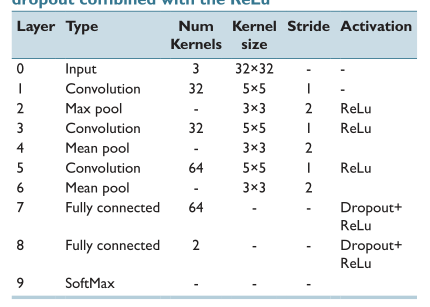

En la red el layer previamente descrita modificamos el layer 8 debidoa que si tiene 2 kernels, no acepta nuestro input de 4 categorias.

Otro detalle es que el layer 7 y 8, el dropout se implemento como un layer extra

In [ ]:
# Functional API
input = keras.Input(shape=(32, 32, 3))
x = keras.layers.Conv2D(32, (5, 5),strides=1)(input)
x = keras.layers.MaxPooling2D((3, 3),strides=2)(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(32, (5, 5),strides=1, activation='relu',padding="same")(x)
x = keras.layers.AveragePooling2D((3, 3),strides=2)(x)
x = keras.layers.Conv2D(64, (5, 5),strides=1, activation='relu')(x)
x = keras.layers.AveragePooling2D((3, 3),strides=2,padding="same")(x)
#convierte el output en una lista tipo (n,1)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
#la siguiente linea fue alterada dado la estructura de los labels.
x = keras.layers.Dense(4, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Softmax()(x)
model_paper = keras.Model(inputs=input, outputs=x)
model_paper.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

## AlexNet Modificada

In [ ]:
# Functional API
input = keras.Input(shape=(240, 320, 3))
x = keras.layers.Conv2D(32, (5, 5),strides=1)(input)
x = keras.layers.MaxPooling2D((3, 3),strides=2)(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(32, (5, 5),strides=1, activation='relu',padding="same")(x)
x = keras.layers.AveragePooling2D((3, 3),strides=2)(x)
x = keras.layers.Conv2D(64, (5, 5),strides=1, activation='relu')(x)
x = keras.layers.AveragePooling2D((3, 3),strides=2,padding="same")(x)
#convierte el output en una lista tipo (n,1)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation='relu')(x)
#aqui se puede afinar el valor del dropout
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(4, activation='relu')(x)
#aqui se puede afinar el valor del dropout
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Softmax()(x)
model_paper2 = keras.Model(inputs=input, outputs=x)

#aqui se pueden afinar variables esta todo default
model_paper2.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

## Alexnet para imagenes full

In [ ]:
# Functional API
input = keras.Input(shape=(480, 640, 3))
x = keras.layers.Conv2D(32*3, (5, 5),strides=1)(input)
x = keras.layers.MaxPooling2D((3, 3),strides=2)(x)
x = keras.layers.ReLU()(x)
x = keras.layers.Conv2D(32*3, (5, 5),strides=1, activation='relu',padding="same")(x)
x = keras.layers.AveragePooling2D((3, 3),strides=2)(x)
x = keras.layers.Conv2D(64*1, (5, 5),strides=1, activation='relu')(x)
x = keras.layers.AveragePooling2D((3, 3),strides=2,padding="same")(x)
#convierte el output en una lista tipo (n,1)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64*1, activation='relu')(x)
#aqui se puede afinar el valor del dropout
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(4, activation='relu')(x)
#aqui se puede afinar el valor del dropout
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Softmax()(x)
model_mod = keras.Model(inputs=input, outputs=x)

#aqui se pueden afinar variables esta todo default
model_mod.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

## red KNN


In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn_small = KNeighborsClassifier(n_neighbors=4)


## red MLP

In [ ]:
mlp = MLPClassifier(random_state=1, learning_rate_init=0.005)
mlp_small = MLPClassifier(random_state=1, learning_rate_init=0.005)


# Entrenamiento y resultados  

## AlexNetPaper

In [ ]:
print(X3.shape)
print(Y3.shape)
model_paper.fit(X4, Y4, validation_split=0.33, epochs=5)

(9957, 32, 32, 3)
(9957, 4)
Epoch 1/5
8/8 [==============================] - 2s 90ms/step - loss: 1.3535 - accuracy: 0.4397 - val_loss: 1.1140 - val_accuracy: 0.7391
Epoch 2/5
8/8 [==============================] - 1s 66ms/step - loss: 1.3052 - accuracy: 0.4440 - val_loss: 1.1985 - val_accuracy: 0.7391
Epoch 3/5
8/8 [==============================] - 1s 66ms/step - loss: 1.2872 - accuracy: 0.4828 - val_loss: 1.1407 - val_accuracy: 0.7391
Epoch 4/5
8/8 [==============================] - 0s 63ms/step - loss: 1.3142 - accuracy: 0.4483 - val_loss: 1.2099 - val_accuracy: 0.7391
Epoch 5/5
8/8 [==============================] - 1s 64ms/step - loss: 1.3118 - accuracy: 0.4353 - val_loss: 1.1779 - val_accuracy: 0.7391


In [ ]:
metrics_paper=model_paper.evaluate(X4,Y4)

11/11 [==============================] - 0s 15ms/step - loss: 1.2294 - accuracy: 0.5937


## AlexNet Modificada

In [ ]:
model_mod.fit(X4_or[0:30], Y4[0:30], validation_split=0.33, epochs=5)

Epoch 1/5
1/1 [==============================] - 19s 19s/step - loss: 55.7360 - accuracy: 0.4000 - val_loss: 2856.8672 - val_accuracy: 0.1000
Epoch 2/5
1/1 [==============================] - 17s 17s/step - loss: 1620.6443 - accuracy: 0.4000 - val_loss: 1.3863 - val_accuracy: 0.4000
Epoch 3/5
1/1 [==============================] - 17s 17s/step - loss: 287.2747 - accuracy: 0.5000 - val_loss: 1.3863 - val_accuracy: 0.4000
Epoch 4/5
1/1 [==============================] - 17s 17s/step - loss: 91.6072 - accuracy: 0.3500 - val_loss: 1.3863 - val_accuracy: 0.4000
Epoch 5/5
1/1 [==============================] - 17s 17s/step - loss: 187.2043 - accuracy: 0.3000 - val_loss: 211.9211 - val_accuracy: 0.1000


In [ ]:
metrics_mod=model_mod.evaluate(X4_or[30:60],Y4[30:60])
print(metrics_mod)

1/1 [==============================] - 5s 5s/step - loss: 157.6215 - accuracy: 0.3333
[157.6215362548828, 0.3333333432674408]


## KNN

In [ ]:
print(X3_or_mlp.shape)
print(X4_or_mlp.shape)

(9957, 230400)
(347, 921600)


In [ ]:
# Generate 100 unique random numbers within a range
num_list = random.sample(range(0, 9900), 5000)
tempArr=[]
tempLab=[]
for i in num_list:
  tempArr.append(X3_mlp[i])
  tempLab.append(Y3[i])
knn_small.fit(tempArr, tempLab)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
metrics_knn2=knn_small.score(X2_mlp,Y2)
print(metrics_knn2)

0.05950944913550463


In [ ]:
# Generate 100 unique random numbers within a range
num_list = random.sample(range(0, 9900), 300)
tempArr=[]
tempLab=[]
for i in num_list:
  tempArr.append(X3_or_mlp[i])
  tempLab.append(Y3[i])
knn.fit(tempArr, tempLab)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
metrics_knn1=knn.score(X2_or_mlp,Y2)
print(metrics_knn1)

0.05548854041013269


## MLP

In [ ]:
# Generate 100 unique random numbers within a range
num_list = random.sample(range(0, 9900), 5000)
tempArr=[]
tempLab=[]
for i in num_list:
  tempArr.append(X3_mlp[i])
  tempLab.append(Y3[i])
mlp_small.fit(tempArr, tempLab)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.005, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
metrics_mlp2=mlp_small.score(X2_mlp,Y2)
print(metrics_mlp2)

0.10534780860474467


In [ ]:
# Generate 100 unique random numbers within a range
num_list = random.sample(range(0, 9900), 300)
tempArr=[]
tempLab=[]
for i in num_list:
  tempArr.append(X3_or_mlp[i])
  tempLab.append(Y3[i])
mlp.fit(tempArr, tempLab)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.005, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
metrics_mlp1=mlp.score(X2_or_mlp,Y2)
print(metrics_mlp1)

0.0


# Conclusion

In [ ]:
print('Score paper: '+str(metrics_paper))
print('Score mod: '+str(metrics_mod))
print('Score knn32: ' +str(metrics_knn2))
print('Score mlp32: '+str(metrics_mlp2))
print('Score knn: ' +str(metrics_knn1))
print('Score mlp: '+str(metrics_mlp1))

Score paper: [1.229358196258545, 0.5936599373817444]
Score mod: [157.6215362548828, 0.3333333432674408]
Score knn32: 0.05950944913550463
Score mlp32: 0.10534780860474467
Score knn: 0.05548854041013269
Score mlp: 0.0
